# Latar Belakang
Boston, sebuah kota di Massachusetts, Amerika serikat, ingin membuat kotanya menjadi lebih aman. kepolisian boston telah sepakat ingin meningkatkan kepercayaan masyarakat dengan cara menangani kasus kasus darurat dengan lebih cepat & lebih baik. 


## Pernyataan Masalah
Kepolisian Boston ingin mengetahui **Kejahatan mana yang sering terjadi atau paling bahaya di Boston**.
Informasi ini akan membantu kepolisian Boston untuk melakukan persiapan, mengurangi waktu training, dan meningkatkan kualitas penanganan kejahatan selama menjaga keamanan di kota Boston.

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Kejahatan mana kah yang sebaiknya dipersiapkan/di awasi lebih oleh kepolisian Boston, terutama yang paling sering dan paling berbahaya?**

# Data
untuk menjawabb pertanyaan di atas, kita akan memeriksa data histocial kejahatan di Boston yang sudah di kumpulkan.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly

from datetime import datetime

import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")

from folium import Choropleth, Circle, Marker, Map
from folium.plugins import HeatMap, MarkerCluster
import plotly.express as px
import plotly.graph_objects as go
import math

Dataset ini berisi informasi mengenai kejahatan / kejadian yang terjadi di Boston, dimulai dari jenis kejahatan / kejadian, lokasi kejahatan / kejadian, dan waktu kejahatan / kejadian. ada 17 kolom di dataset crime.csv, yaitu:

* INCIDENT_NUMBER : ID unik untuk setiap kejadian
* OFFENSE_CODE : Code untuk kejahatan / kejadian
* OFFENSE_CODE_GROUP : Nama grup dari kejahatan / kejadian
* OFFENSE_DESCRIPTION : Deskripsi dari kejahatan / kejadian
* DISTRICT : District dimana kejahatan / kejadian terjadi
* REPORTING_AREA : Area kejahatan / kejadian di laporkan
* SHOOTING : Apakah kejahatan / kejadian ini termasuk penembakan (Y: ada penembakan)
* OCCURRED_ON_DATE : kapan kejahatan / kejadian terjadi 
* YEAR : Tahun kejahatan / kejadian terjadi
* MONTH : Bulan kejahatan / kejadian terjadi
* DAY_OF_WEEK : nama hari kejahatan / kejadian terjadi 
* HOUR : jam kejahatan / kejadian terjadi 
* UCR_PART : (uniform crime reports)  tingkat untuk mengukur tingkat dan ruang lingkup kejahatan yang terjadi di Amerika Serikat
* STREET : Nama jalan kejahatan / kejadian terjadi
* Lat : latitude, titik geografis dimana kejahatan / kejadian terjadi 
* Long : Longitude, titik geografis dimana kejahatan / kejadian terjadi 
* Location : gabungan dari Lat-Long, titik geografis dimana kejahatan / kejadian terjadi 

Berikut 5 baris teratas dan terbawah dari dataset crime.csv.

In [3]:
df=pd.read_csv('crime.csv',encoding='windows-1254')
display(df.head(),df.tail())

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

DUPLICATE
<br><br>
Langkah yang dilakukan pertama adalah untuk menghilangkan duplikat, bisa dilihat menggunakan kolom ID (INCIDENT_NUMBER)

In [4]:
print(len(df))
print(len(df.drop_duplicates(subset='INCIDENT_NUMBER', keep='first')))

# Ternyata ada perbedaan antara sebelum & sesudah di drop duplicate datanya.

319073
282517


In [5]:
# lakukan drop duplicate pada kolom INCIDENT_NUMBER :
df=df.drop_duplicates(subset='INCIDENT_NUMBER', keep='first').reset_index(drop=True)

INFO KOLOM
<br><br>
Selanjutnya kita bisa melihat mengenai informasi kolom kolom 

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282517 entries, 0 to 282516
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      282517 non-null  object 
 1   OFFENSE_CODE         282517 non-null  int64  
 2   OFFENSE_CODE_GROUP   282517 non-null  object 
 3   OFFENSE_DESCRIPTION  282517 non-null  object 
 4   DISTRICT             280934 non-null  object 
 5   REPORTING_AREA       282517 non-null  object 
 6   SHOOTING             626 non-null     object 
 7   OCCURRED_ON_DATE     282517 non-null  object 
 8   YEAR                 282517 non-null  int64  
 9   MONTH                282517 non-null  int64  
 10  DAY_OF_WEEK          282517 non-null  object 
 11  HOUR                 282517 non-null  int64  
 12  UCR_PART             282463 non-null  object 
 13  STREET               273249 non-null  object 
 14  Lat                  265313 non-null  float64
 15  Long             

In [7]:
display(df.describe(), df.describe(include='object'))

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,282517.000000,282517.000000,282517.000000,282517.000000,265313.000000,265313.000000
mean,2326.825444,2016.562692,6.612420,13.145545,42.212491,-70.905304
std,1201.664559,0.995500,3.272773,6.254045,2.179400,3.525385
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,802.000000,2016.000000,4.000000,9.000000,42.297163,-71.097951
50%,3006.000000,2017.000000,7.000000,14.000000,42.325653,-71.077720
75%,3207.000000,2017.000000,9.000000,18.000000,42.348624,-71.062149
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Location
count,282517,282517,282517,280934,282517,626,282517,282517,282463,273249,282517
unique,282517,67,210,12,879,1,233229,7,4,4657,18194
top,I182070945,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,2015-07-01 00:00:00,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,1,35447,18474,43403,17624,626,24,42886,145730,12338,17204


In [8]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,INCIDENT_NUMBER,282517,"[I182070945, I182070943, I182070941, I182070940, I182070938, I182070936, I182070933, I182070932, I182070931, I182070929, I182070928, I182070927, I182070923, I182070922, I182070921, I182070920, I182070919, I182070918, I182070917, I182070915, I182070913, I182070911, I182070910, I182070909, I182070908, I182070906, I182070905, I182070904, I182070903, I182070901, I182070900, I182070898, I182070897, I182070895, I182070893, I182070892, I182070891, I182070890, I182070889, I182070888, I182070887, I182070886, I182070885, I182070882, I182070881, I182070880, I182070879, I182070877, I182070876, I182070875, I182070874, I182070873, I182070872, I182070871, I182070870, I182070868, I182070866, I182070865, I182070863, I182070862, I182070861, I182070860, I182070859, I182070858, I182070857, I182070856, I182070855, I182070854, I182070852, I182070851, I182070850, I182070849, I182070847, I182070846, I182070844, I182070843, I182070842, I182070841, I182070840, I182070839, I182070838, I182070837, I182070836, I182070835, I182070834, I182070833, I182070832, I182070831, I182070830, I182070829, I182070828, I182070827, I182070826, I182070825, I182070824, I182070823, I182070822, I182070820, I182070819, I182070818, ...]"
1,OFFENSE_CODE,202,"[619, 1402, 3410, 3114, 3820, 724, 3301, 301, 3108, 2647, 3201, 3006, 3305, 614, 3801, 3803, 522, 3831, 802, 2900, 2907, 2629, 2662, 3207, 613, 3109, 2612, 1843, 3802, 3018, 617, 3625, 3501, 3115, 616, 3807, 1102, 1849, 2905, 1810, 1806, 1848, 1844, 423, 3205, 413, 3001, 3830, 561, 2914, 1109, 706, 3160, 2610, 3125, 801, 3002, 520, 2405, 670, 615, 3116, 1504, 1830, 361, 311, 1001, 3810, 2401, 2403, 2646, 3821, 3811, 3007, 2660, 1831, 3119, 3112, 1842, 735, 612, 560, 381, 3402, 1107, 2101, 1106, 3202, 2007, 1503, 1846, 3502, 3016, 3304, 611, 3111, 3503, 2906, 540, 1501, ...]"
2,OFFENSE_CODE_GROUP,67,"[Larceny, Vandalism, Towed, Investigate Property, Motor Vehicle Accident Response, Auto Theft, Verbal Disputes, Robbery, Fire Related Reports, Other, Property Lost, Medical Assistance, Assembly or Gathering Violations, Larceny From Motor Vehicle, Residential Burglary, Simple Assault, Violations, Harassment, Ballistics, Property Found, Police Service Incidents, Drug Violation, Missing Person Reported, Investigate Person, Fraud, Aggravated Assault, License Plate Related Incidents, Other Burglary, Warrant Arrests, Disorderly Conduct, Harbor Related Incidents, Counterfeiting, Liquor Violation, Firearm Discovery, Landlord/Tenant Disputes, Auto Theft Recovery, Service, Operating Under the Influence, Confidence Games, Restraining Order Violations, Firearm Violations, Missing Person Located, License Violation, Commercial Burglary, Search Warrants, Recovered Stolen Property, Offenses Against Child / Family, Prostitution, Bomb Hoax, Evading Fare, Property Related Damage, Prisoner Related Incidents, Homicide, Embezzlement, Explosives, Arson, Criminal Harassment, HOME INVASION, Phone Call Complaints, Aircraft, Biological Threat, Manslaughter, INVESTIGATE PERSON, Gambling, HUMAN TRAFFICKING, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, Burglary - No Property Taken]"
3,OFFENSE_DESCRIPTION,210,"[LARCENY ALL OTHERS, VANDALISM, TOWED MOTOR VEHICLE, INVESTIGATE PROPERTY, M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY, AUTO THEFT, VERBAL DISPUTE, ROBBERY - STREET, FIRE REPORT - HOUSE, BUILDING, ETC., THREATS TO DO BODILY HARM, PROPERTY - LOST, SICK/INJURED/MEDICAL - PERSON, DEMONSTRATIONS/RIOT, LARCENY THEFT FROM MV - NON-ACCESSORY, M/V ACCIDENT - OTHER, M/V ACCIDENT - PERSONAL INJURY, BURGLARY - RESIDENTIAL - NO FORCE, M/V - LEAVING SCENE - PROPERTY DAMAGE, ASSAULT SIMPLE - BATTERY, VAL - VIOLATION OF AUTO LAW - OTHER, VAL - OPERATING AFTER REV/SUSP., HARASSMENT, BALLISTICS EVIDENCE/FOUND, PROPERTY - FOUND, LARCENY SHOPLIFTING, SERVICE TO OTHER PD INSIDE OF MA., FIRE REPORT/ALARM - FALSE, DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP, M/V ACCIDENT - PROPERTY DAMAGE, SICK/INJURED/MED

DATA CONCLUSSION

* dataset crime memiliki 17 kolom dan 282.517 baris
* beberapa kolom, yaitu, `SHOOTING`, `DISTRICT`, `UCR_PART`, `STREET`, `Lat`, `Long` memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `INCIDENT_NUMBER` berisikan id unik untuk tiap incident.
* Data yang dikumpulkan dari Juli 2015 sampai Agustus 2018
* Data yang dikumpulkan hanya berupa kejahatan / kejadian di Boston
* Data missing di kolom `SHOOTING` berarti tidak ada penembakan

## Missing Value

<AxesSubplot:>

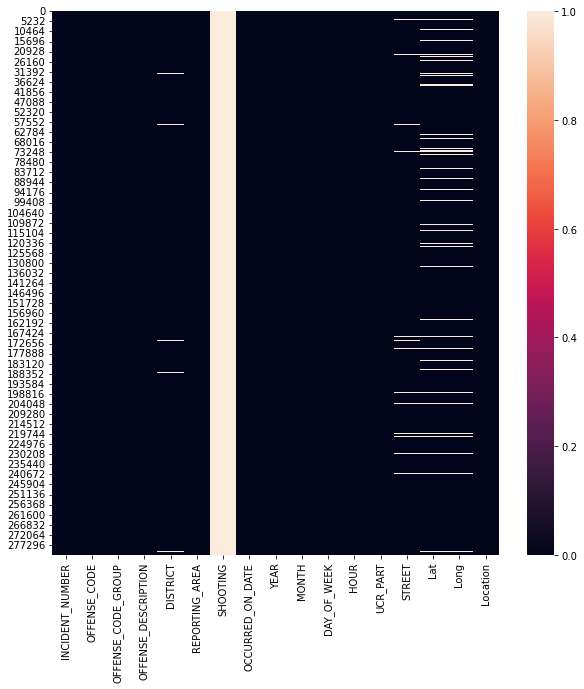

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['INCIDENT_NUMBER',
 'OFFENSE_CODE',
 'OFFENSE_CODE_GROUP',
 'OFFENSE_DESCRIPTION',
 'DISTRICT',
 'REPORTING_AREA',
 'SHOOTING',
 'OCCURRED_ON_DATE',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long',
 'Location']].isna())

In [10]:
df.isna().sum()

INCIDENT_NUMBER        0     
OFFENSE_CODE           0     
OFFENSE_CODE_GROUP     0     
OFFENSE_DESCRIPTION    0     
DISTRICT               1583  
REPORTING_AREA         0     
SHOOTING               281891
OCCURRED_ON_DATE       0     
YEAR                   0     
MONTH                  0     
DAY_OF_WEEK            0     
HOUR                   0     
UCR_PART               54    
STREET                 9268  
Lat                    17204 
Long                   17204 
Location               0     
dtype: int64

Overview
Secara garis besar:
* *missing value* di kolom `SHOOTING`, `DISTRICT`, `UCR_PART`, `STREET`, `Lat`, `Long` memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom `SHOOTING` mencapai 99.77%.
* Namun, pada kolom `SHOOTING` dapat diartikan bahwa *missing value* artinya 'No', bukan missing
* *missing value* di kolom selain `SHOOTING` , yaitu di `DISTRICT`, `UCR_PART`, `STREET`, `Lat`, `Long`, memiliki proporsi rendah (sekitar 6%)

Cara penanganan Missing Values:
1. Pertama bisa dengan menghapus baris/kolom yang berisi *missing value*, cara ini cocok untuk kolom kolom selain `SHOOTING` karena missing value cukup rendah (sekitar 6%)
2. Kedua dengan mengisi data hilang. cocok untuk kolom `SHOOTING`, karena missing di kolom ini dapat diartikan sebagai 'NO'

SHOOTING
<br><br>
pada kolom ini, data NaN dapat diartikan sebagai tidak ada penembakan yang terjadi di suatu pelanggaran, maka NaN dapat diisi dengan N.

In [11]:
# Fill NaN di shooting dengan 'N'
df[['SHOOTING']]=df[['SHOOTING']].fillna('N')
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282512,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,N,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
282513,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
282514,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
282515,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


Lat/Long/Location

In [12]:
# tujuan ingin mengisi Lat & Long berdasarkan location
# namun ternyata semua yang Lat/Longnya NaN memiliki Location (0.00000000, 0.00000000)
df[df['Lat'].isnull()]['Location'].unique()


array(['(0.00000000, 0.00000000)'], dtype=object)

In [13]:
df.iloc[np.where(df["Lat"].isna())[0]][['Lat','Long','Location']]

,Lat,Long,Location
39,NaN,NaN,"(0.00000000, 0.00000000)"
352,NaN,NaN,"(0.00000000, 0.00000000)"
370,NaN,NaN,"(0.00000000, 0.00000000)"
439,NaN,NaN,"(0.00000000, 0.00000000)"
805,NaN,NaN,"(0.00000000, 0.00000000)"
...,...,...,...
282485,NaN,NaN,"(0.00000000, 0.00000000)"
282489,NaN,NaN,"(0.00000000, 0.00000000)"
282490,NaN,NaN,"(0.00000000, 0.00000000)"
282500,NaN,NaN,"(0.00000000, 0.00000000)"


In [14]:
# remove rows with NaN di Lat, Long, & Location
df=df.dropna(subset=['Lat', 'Long', 'Location'])
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282512,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,N,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
282513,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
282514,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
282515,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


District, UCR_part, Street
<br><br>
karena masih ada beberapa kolom yang memiliki NaN & jumlahnya sedikit dibbanding keseluruhan data, baris yang memiliki NaN di kolom tersebut di drop

In [15]:
df=df.dropna(subset=['DISTRICT','UCR_PART','STREET'])
df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282512,I060168073-00,1864,Drug Violation,DRUGS - POSS CLASS D - INTENT MFR DIST DISP,E13,912,N,2018-01-27 14:01:00,2018,1,Saturday,14,Part Two,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
282513,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,N,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
282514,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,N,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
282515,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,N,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [16]:
df.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [17]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(263187, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,INCIDENT_NUMBER,object,0,263187,"[I152085369, I172088888]"
1,OFFENSE_CODE,int64,0,199,"[2101, 1831]"
2,OFFENSE_CODE_GROUP,object,0,63,"[Missing Person Located, Restraining Order Violations]"
3,OFFENSE_DESCRIPTION,object,0,207,"[BURGLARY - OTHER - ATTEMPT, WEAPON - FIREARM - OTHER VIOLATION]"
4,DISTRICT,object,0,12,"[E5, E13]"
5,REPORTING_AREA,object,0,879,"[782, 613]"
6,SHOOTING,object,0,2,"[Y, N]"
7,OCCURRED_ON_DATE,object,0,218555,"[2016-04-16 00:49:00, 2018-01-31 21:04:00]"
8,YEAR,int64,0,4,"[2016, 2017]"
9,MONTH,int64,0,12,"[6, 4]"


Sebelum dibersihkan, kita memiliki 319.073 baris data, setelah di hilangkan data duplikat kita memiliki 282.517 baris data, dan setelah kita bersihkan sekarang kita memiliki 263.187 baris. Sekitar 36.556 baris data yang duplikat dihapus, 19.330 baris data yang missing di hapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Kejahatan mana saja kah yang sebaiknya di persiapkan oleh kepolisian Boston, terutama yang paling sering dann paling berbahaya?**.  

Analisis akan dilakukan dengan beberapa cara :
1. menganalisa kejahatan apa yang paling sering terjadi di Boston
2. menganalisa di jalan mana kejahatan yang paling sering terjadi di Boston
3. melihat perbedaan jumlah kejahatan antara weekend & weekday
4. melihat kejahatan berpotensi fatal (dimana adanya penembakan) - kapan terjadinya dan dimana?
5. Melihat jumlah kejahatan dari tahun ke tahun.


## Kejahatann yang paling sering terjadi di Boston

In [18]:
df_analysis1=df.groupby(df['OFFENSE_CODE_GROUP'])[['INCIDENT_NUMBER']].count().reset_index().sort_values(by='INCIDENT_NUMBER',ascending=False)[:10]
df_analysis1

,OFFENSE_CODE_GROUP,INCIDENT_NUMBER
39,Motor Vehicle Accident Response,29033
30,Larceny,23630
36,Medical Assistance,21887
27,Investigate Person,17259
42,Other,13248
59,Vandalism,13172
57,Simple Assault,12770
60,Verbal Disputes,12428
58,Towed,10317
15,Drug Violation,10243


In [19]:
fig = px.bar(
    df_analysis1,
    x='OFFENSE_CODE_GROUP',
    y='INCIDENT_NUMBER',
    title="Number of incident per Offense group",
    color='INCIDENT_NUMBER'
)

fig.show()

Dari analisa ini kita bisa mendapat kesimpulan : 
* 3 kejahatan/kejadian yang paling sering terjadi adalah Motor Vehicle Accident Response (kecelakaan), Larceny (pencurian), dan Medical Assistance (kebutuhan medis)

## Dimanakah paling sering terjadi kejahatan

In [20]:
df_analysis2 = df[['STREET','OFFENSE_CODE_GROUP']].groupby('STREET').count().sort_values(by='OFFENSE_CODE_GROUP',ascending=False).reset_index().head(10)
df_analysis2

,STREET,OFFENSE_CODE_GROUP
0,WASHINGTON ST,12262
1,BLUE HILL AVE,6150
2,BOYLSTON ST,5896
3,DORCHESTER AVE,4316
4,TREMONT ST,4047
5,CENTRE ST,3792
6,MASSACHUSETTS AVE,3656
7,COMMONWEALTH AVE,3612
8,HARRISON AVE,3433
9,HYDE PARK AVE,3122


In [22]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        y=df_analysis2['STREET'],
        x=df_analysis2['OFFENSE_CODE_GROUP'],
        orientation='h',
        name='Street',
        hoverinfo='all'
    ))
fig.update_layout(title='Number of Offenses for Each Streets', xaxis_tickfont_size=14)

fig.show()

Dari analisa ini kita bisa mendapat kesimpulan : 
* kejahatan/kejadian paling sering terjadi di WASHINGTON ST, BLUE HILL AVE, BOYLSTON ST, DORCHESTER AVE, dan TREMONT ST

## Kapan kejahatan paling sering terjadi 

In [21]:
fig = go.Figure(layout={'height':550})

fig.add_trace(go.Bar(
    x=df.groupby('HOUR')['INCIDENT_NUMBER'].count().reset_index()['HOUR'], 
    y=df.groupby('HOUR')['INCIDENT_NUMBER'].count().reset_index()['INCIDENT_NUMBER'], 
    # name='Weekend', 
    marker_color='rgb(200, 83, 109)'))

fig.update_layout(title='Number of Offenses over the Hours', xaxis_tickfont_size=14,

    yaxis=dict(
        title='Number of Offenses', 
        titlefont_size=16, 
        tickfont_size=14),

    xaxis=dict(
        title='Hour', 
        titlefont_size=16, 
        tickfont_size=14),
        
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'), 
                  barmode='group', bargap=0.15, bargroupgap=0.2)
                  
fig.show()

In [22]:
# membedakan weekend & midweek
df_weekend=df[(df['DAY_OF_WEEK']=='Saturday')|(df['DAY_OF_WEEK']=='Sunday')]
df_midweek=df[~(df['DAY_OF_WEEK']=='Saturday')|(df['DAY_OF_WEEK']=='Sunday')]

# group by Hour
df_weekend=df_weekend.groupby('HOUR')['INCIDENT_NUMBER'].count().reset_index()
df_midweek=df_midweek.groupby('HOUR')['INCIDENT_NUMBER'].count().reset_index()

In [23]:
fig = go.Figure(layout={'height':550})

fig.add_trace(go.Bar(
    x=df_weekend['HOUR'], 
    y=df_weekend['INCIDENT_NUMBER'], 
    name='Weekend', 
    marker_color='rgb(200, 83, 109)'))

fig.add_trace(go.Bar(
    x=df_midweek['HOUR'], 
    y=df_midweek['INCIDENT_NUMBER'], 
    name='Midweek', 
    marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Number of Offenses in Weekend/Midweek over the Hours', xaxis_tickfont_size=14,

    yaxis=dict(
        title='Number of Offenses', 
        titlefont_size=16, 
        tickfont_size=14),

    xaxis=dict(
        title='Hour', 
        titlefont_size=16, 
        tickfont_size=14),
        
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'), 
                  barmode='group', bargap=0.15, bargroupgap=0.2)
fig.show()

Dari analisa ini kita bisa mendapat kesimpulan : 
* kejahatan/kejadian paling serinng terjadi di sore hari (spesifiknya jam 16.00-18.00)
* rata rata kejahatan/kejadian perhari lebih sering terjadi di midweek (senin-jum'at)

## Kejahatan dengan penembakan apa yang paling sering terjadi?

In [24]:
df_analysis_4 = df[df['SHOOTING']=='Y'][['OFFENSE_CODE_GROUP','SHOOTING']].groupby('OFFENSE_CODE_GROUP').count().sort_values(by='SHOOTING',ascending=False).reset_index()
df_analysis_4

,OFFENSE_CODE_GROUP,SHOOTING
0,Aggravated Assault,424
1,Homicide,86
2,Firearm Violations,17
3,Robbery,13
4,Medical Assistance,9
5,Ballistics,9
6,Warrant Arrests,8
7,Investigate Property,4
8,Vandalism,4
9,Investigate Person,3


In [25]:
fig = px.bar(
    df_analysis_4.head(),
    x='OFFENSE_CODE_GROUP',
    y='SHOOTING',
    title="Number of incident per Offense group with shooting",
    color='SHOOTING'
)

fig.show()

Dari analisa ini kita bisa mendapat kesimpulan : 
* 3 kejahatan/kejadian  **berpotensi fatal (melibatkan senjata api)** dan yang paling sering terjadi Aggravated Assault (Penyerangan), Homicide (pembunuhan), Firearm Violations (Pelanggaran Senjata Api)

## Dimana penembakan paling sering terjadi 

In [26]:
df_shoot = df[df['SHOOTING']=='Y']
df_shoot.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1187,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
1703,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
2985,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
3748,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"
4711,I182065260,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",D4,594,Y,2018-08-15 23:21:00,2018,8,Wednesday,23,Part Two,MASSACHUSETTS AVE,42.341870,-71.083722,"(42.34186952, -71.08372190)"


In [27]:
df_analysis = df_shoot[['STREET','OFFENSE_CODE_GROUP']].groupby('STREET').count().sort_values(by='OFFENSE_CODE_GROUP',ascending=False).reset_index().head(10)
df_analysis

,STREET,OFFENSE_CODE_GROUP
0,WASHINGTON ST,21
1,BLUE HILL AVE,20
2,DUDLEY ST,14
3,COLUMBIA RD,12
4,CENTRE ST,10
5,GENEVA AVE,8
6,ANNUNCIATION RD,7
7,TREMONT ST,6
8,WALNUT PARK,5
9,HUMBOLDT AVE,5


Dari analisa ini kita bisa mendapat kesimpulan : 
* kejahatan/kejadian **berpotensi fatal (melibatkan senjata api)** paling sering terjadi di WASHINGTON ST, BLUE HILL AVE, dan DUDLEY ST

## Kapan penembakan paling sering terjadi

In [28]:
fig = go.Figure(layout={'height':550})

fig.add_trace(go.Bar(
    x=df_shoot.groupby('HOUR')['INCIDENT_NUMBER'].count().reset_index()['HOUR'], 
    y=df_shoot.groupby('HOUR')['INCIDENT_NUMBER'].count().reset_index()['INCIDENT_NUMBER'], 
    marker_color='rgb(200, 83, 109)'))

fig.update_layout(title='Number of Offenses with Shootings over the Hours', xaxis_tickfont_size=14,

    yaxis=dict(
        title='Number of Offenses', 
        titlefont_size=16, 
        tickfont_size=14),

    xaxis=dict(
        title='Hour', 
        titlefont_size=16, 
        tickfont_size=14),
        
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'), 
                  barmode='group', bargap=0.15, bargroupgap=0.2)
                  
fig.show()

Dari analisa ini kita bisa mendapat kesimpulan : 
* kejahatan/kejadian  **berpotensi fatal (melibatkan senjata api)** paling sering terjadi di malam hari (jam 22.00 - 1.00)

## Peta dengan cluster kejadian kejahatan

In [ ]:
m = Map(location=[42.361145, -71.057083], zoom_start=13)
cluster = MarkerCluster()
for idx, row in df.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        cluster.add_child(Marker([row['Lat'], row['Long']]))
m.add_child(cluster)

#terlalu besar untuk di show, harus di run

## Analisa Crime dari tahun ke tahun

In [30]:
df[['YEAR','INCIDENT_NUMBER',]].groupby('YEAR').count().reset_index()

,YEAR,INCIDENT_NUMBER
0,2015,45087
1,2016,81399
2,2017,82659
3,2018,54042


In [31]:
df_shoot[['YEAR','INCIDENT_NUMBER',]].groupby('YEAR').count().reset_index()

,YEAR,INCIDENT_NUMBER
0,2015,116
1,2016,178
2,2017,209
3,2018,94


In [32]:
fig = go.Figure(layout={'height':550})

fig.add_trace(go.Bar(
    x=df[['YEAR','INCIDENT_NUMBER',]].groupby('YEAR').count().reset_index()['YEAR'], 
    y=df[['YEAR','INCIDENT_NUMBER',]].groupby('YEAR').count().reset_index()['INCIDENT_NUMBER'], 
    name='Crime', 
    marker_color='rgb(200, 83, 109)'))

fig.update_layout(title='Number of Crime per Year', xaxis_tickfont_size=14,

    yaxis=dict(
        title='Number of Crime', 
        titlefont_size=16, 
        tickfont_size=14),

    xaxis=dict(
        title='Year', 
        titlefont_size=16, 
        tickfont_size=14),
        
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'), 
                  barmode='group', bargap=0.15, bargroupgap=0.2)
fig.show()

In [33]:
fig = go.Figure(layout={'height':550})

fig.add_trace(go.Bar(
    x=df_shoot[['YEAR','INCIDENT_NUMBER',]].groupby('YEAR').count().reset_index()['YEAR'], 
    y=df_shoot[['YEAR','INCIDENT_NUMBER',]].groupby('YEAR').count().reset_index()['INCIDENT_NUMBER'], 
    name='Crime w/ Shooting', 
    marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Number of Shootings per Year', xaxis_tickfont_size=14,

    yaxis=dict(
        title='Number of Shooting', 
        titlefont_size=16, 
        tickfont_size=14),

    xaxis=dict(
        title='Year', 
        titlefont_size=16, 
        tickfont_size=14),
        
    legend=dict(x=0, y=1.0, bgcolor='rgba(255, 255, 255, 0)', bordercolor='rgba(255, 255, 255, 0)'), 
                  barmode='group', bargap=0.15, bargroupgap=0.2)
fig.show()

Dari analisa ini kita bisa mendapat kesimpulan : 
* kejahatan/kejadian dari tahun ke tahun mengalami kenaikan
* kejahatan/kejadian **berpotensi fatal (melibatkan senjata api)** dari tahun ke tahun mengalami kenaikan

Alasan:
- tahun 2018 terlihat rendahh karena dataset Crime hanya sampai Septemer 2018

In [34]:
# Jumlah month di data 2018
list(df[df['YEAR']==2018].groupby('MONTH').count().reset_index()['MONTH'])

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan kita bisa membuat kesimpulan berikut tentang kejahatan / kejadian di Boston:

* 3 kejahatan/kejadian yang paling sering terjadi adalah Motor Vehicle Accident Response (kecelakaan), Larceny (pencurian), dan Medical Assistance (kebutuhan medis)
* kejahatan/kejadian paling sering terjadi di WASHINGTON ST, BLUE HILL AVE, BOYLSTON ST, DORCHESTER AVE, dan TREMONT ST
* kejahatan/kejadian paling sering terjadi di sore hari (spesifiknya jam 16.00-18.00)

Ada juga dari analisa yang telah kita lakukan, kita bisa membuat kesimpulan berikut tentang kejahatan / kejadian yang melibatkan **penembakan** di Boston: 

* 3 kejahatan/kejadian  **berpotensi fatal (melibatkan senjata api)** dan yang paling sering terjadi Aggravated Assault (Penyerangan), Homicide (pembunuhan), Firearm Violations (Pelanggaran Senjata Api)
* kejahatan/kejadian **berpotensi fatal (melibatkan senjata api)** paling sering terjadi di WASHINGTON ST, BLUE HILL AVE, dan DUDLEY ST
* kejahatan/kejadian  **berpotensi fatal (melibatkan senjata api)** paling sering terjadi di malam hari (jam 22.00 - 1.00)

Analisa Tambahan : 
* kejahatan/kejadian dari tahun ke tahun mengalami kenaikan
* kejahatan/kejadian **berpotensi fatal (melibatkan senjata api)** dari tahun ke tahun mengalami kenaikan

**Rekomendasi**
1. Kepolisian Boston dapat melakukan persiapan lebih terhadap 3 kejahatan/kejadian yang paling sering terjadi (Motor Vehicle Accident Response (kecelakaan), Larceny (pencurian), dan Medical Assistance (kebutuhan medis))
2. Patroli dapat dilakukan lebih aktif di jalanan yang lebih sering terjadi kejahatan/kejadian, antara lain WASHINGTON ST, BLUE HILL AVE, BOYLSTON ST, DORCHESTER AVE, dan TREMONT ST
3. untuk jam-jam yang lebih rawan terjadi kejahatan/kejadian (jam 16.00-18.00), patroli dapat ditingkatkan dan kepolisian dapat meningkatkan jumlah polisi yang siap menjadi bantuan
4. Kepolisian Boston juga dapat melakukan persiapan lebih untuk menangani kejahatan/kejadian berpotensi fatal (melibatkan senjata api), 3 diantaranya yang paling sering terjadi adalah Aggravated Assault (Penyerangan), Homicide (pembunuhan), Firearm Violations (Pelanggaran Senjata Api)
5. Patroli dapat dilakukan lebih aktif dan lebih berhati-hati di WASHINGTON ST, BLUE HILL AVE, dan DUDLEY ST karena daerah tersebut lebih rawan terjadi kejahatan/kejadian berpotensi fatal (melibatkan senjata api
6. Untuk jam-jam yang lebih rawan terjadi kejahatan/kejadian berpotensi fatal (melibatkan senjata api) (jam 22.00 - 1.00), patroli dapat diberikan keamanan lebih (bisa berupa baju anti peluru), serta dapat meningkatkan jumlah polisi yang siap menjadi bantuan
7. Kepolisian boston dapat meninkatkan jumlah polisi karena kejahatan/kejadian (baik berpotensi fatal / tidak) diperkirakan akan meningkat.

dengan memberi fokus untuk kejahatan/kejadian yang paling sering terjadi, lokasi, dan juga waktu paling sering terjadi, diharapkan analisis ini bisa membantu kepolisian Boston agar dapat lebih cepat tanggap akan kejahatan/kejadian & bisa meningkatkan kualitas penanganan tersebut.